In [2]:
import os
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
len_min = 3

In [4]:
disease = 'autism'
file_name = 'ehr-shuffle.csv'
date_time_folder = '2018-11-20-17-20-33' 

data_folder = os.path.expanduser('~/data1/complex_disorders/data/%s/cohorts/%s' % (disease, date_time_folder))

with open(os.path.join(data_folder, file_name)) as f:
    rd = csv.reader(f)
    ehr_shuffle = {}
    sub_len = []
    for r in rd:
        sub_len.append(len(r[1::]))
        ehr_shuffle.setdefault(r[0], list()).extend(r[1::])

In [5]:
print("The average number of tokens for each time slot of N days is {0:.2f}".format(np.mean(sub_len)))

The average number of tokens for each time slot of N days is 5.29


(array([1.9055e+04, 2.5220e+03, 5.2400e+02, 1.9500e+02, 8.5000e+01,
        4.4000e+01, 2.3000e+01, 1.3000e+01, 4.0000e+00, 5.0000e+00]),
 array([ 1. ,  9.2, 17.4, 25.6, 33.8, 42. , 50.2, 58.4, 66.6, 74.8, 83. ]),
 <a list of 10 Patch objects>)

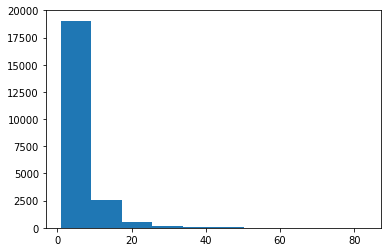

In [6]:
plt.hist(sub_len)

In [7]:
l = []
for mrn in ehr_shuffle:
    l.append(len(ehr_shuffle[mrn]))
print("The average length of ehr sequences is: {0:.2f}".format(np.mean(l)))

The average length of ehr sequences is: 99.11


In [8]:
count = 0
for ll in l:
    if ll<3:
        count += 1
print("{0} of {1} patients have less than 3 records".format(count, len(l)))

60 of 1199 patients have less than 3 records


In [9]:
print("The sequence length ranges from {0} to {1}".format(min(l), max(l)))

The sequence length ranges from 1 to 2274


(array([692., 204., 103.,  72.,  53.,  31.,  12.,   2.,  13.,   3.,   2.,
          4.,   3.,   1.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([1.00000000e+00, 6.41388889e+01, 1.27277778e+02, 1.90416667e+02,
        2.53555556e+02, 3.16694444e+02, 3.79833333e+02, 4.42972222e+02,
        5.06111111e+02, 5.69250000e+02, 6.32388889e+02, 6.95527778e+02,
        7.58666667e+02, 8.21805556e+02, 8.84944444e+02, 9.48083333e+02,
        1.01122222e+03, 1.07436111e+03, 1.13750000e+03, 1.20063889e+03,
        1.26377778e+03, 1.32691667e+03, 1.39005556e+03, 1.45319444e+03,
        1.51633333e+03, 1.57947222e+03, 1.64261111e+03, 1.70575000e+03,
        1.76888889e+03, 1.83202778e+03, 1.89516667e+03, 1.95830556e+03,
        2.02144444e+03, 2.08458333e+03, 2.14772222e+03, 2.21086111e+03,
        2.27400000e+03]),
 <a list of 36 Patch objects>)

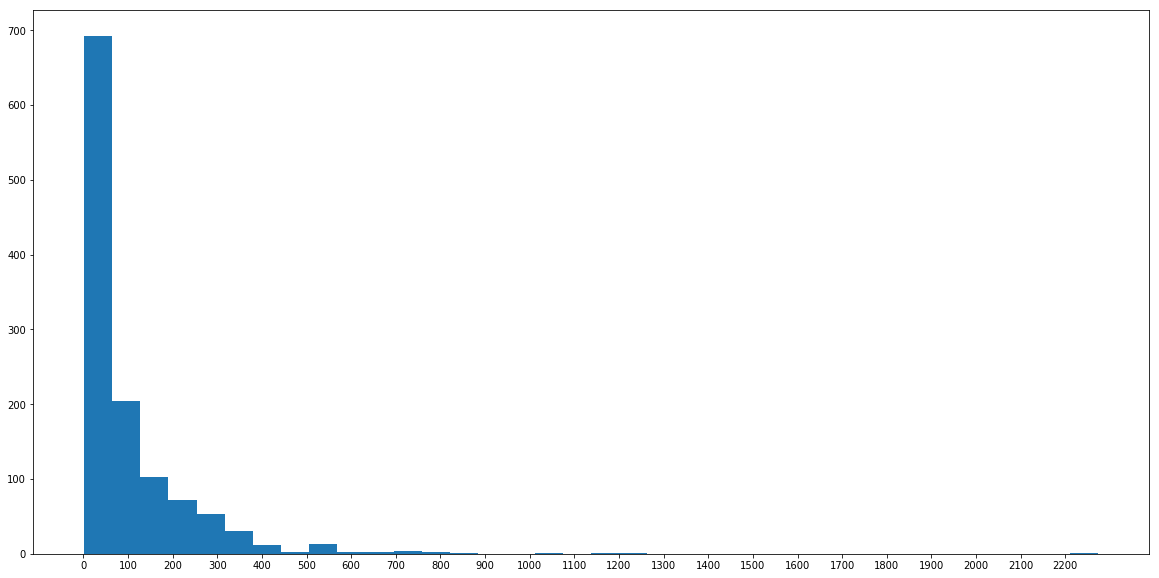

In [10]:
plt.figure(figsize=[20,10])
plt.xticks(np.arange(0, max(l), 100))
plt.hist(l, bins = 36)

In [11]:
with open(os.path.join(data_folder, 'list_mrnToDrop.csv'), 'w') as f:
    wr = csv.writer(f, delimiter=',')
    discard_list = []
    for mrn in ehr_shuffle:
        if len(ehr_shuffle[mrn]) < len_min:
            discard_list.append(mrn)
    wr.writerow(discard_list)

In [12]:
print("We are dropping {0} out of {1} patients".format(len(discard_list), len(ehr_shuffle)))

We are dropping 60 out of 1199 patients
